![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/cortex"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/cortex


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.6 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=5ccb6ad68ad95ad346531c14826eb71866efc9222fcb8013ff7c0e5af07c40a2
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
#%%writefile .authinfo
#oda user USR password PWD

Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/cortex/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 358



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/cortex/sascfg_personal.py
WORK Path             = /saswork/SAS_work645D00012433_odaws02-usw2-2.oda.sas.com/SAS_work1D7E00012433_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 74803


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                    Saturday, December  3, 2022 05:03:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                    Saturday, December  3, 2022 05:03:00 AM

33         


For local Jupyter

In [10]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [11]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [12]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Exploration

In [13]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [14]:
data_merge.isna().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift       663666
MinGift         663666
MaxGift         663666
GaveLastYear         0
AmtLastYear          0
GaveThisYear         0
AmtThisYear          0
dtype: int64

In [15]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
#sns.heatmap(data_merge.corr(), annot=True, cmap="Blues_r")
#plt.show()
data_merge.corr()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
ID,1.000000,-0.002832,-0.000720,-0.000759,0.000815,0.001128,-0.000853,0.000345,-0.001340,-0.000401,-0.001426,-0.000411,-0.001438,-0.000741,0.000066,-0.000845,-0.002595
Woman,-0.002832,1.000000,0.037798,-0.046426,-0.000095,0.001681,-0.000138,-0.002042,-0.000956,-0.002443,0.051112,0.030785,0.050119,-0.000846,0.013658,-0.000691,0.014477
Age,-0.000720,0.037798,1.000000,0.019775,0.000349,0.000411,-0.002079,-0.000671,-0.002581,-0.001805,-0.051445,-0.029519,-0.051216,-0.001535,-0.013239,0.000379,-0.013522
Salary,-0.000759,-0.046426,0.019775,1.000000,-0.000195,0.000421,0.000426,-0.003451,0.001889,-0.001951,0.075216,0.048340,0.074186,0.001101,0.021870,0.001416,0.022055
SeniorList,0.000815,-0.000095,0.000349,-0.000195,1.000000,0.408294,0.385607,0.409977,0.293257,0.662898,0.058632,-0.049351,0.030649,-0.000125,0.001313,-0.001315,-0.001249
NbActivities,0.001128,0.001681,0.000411,0.000421,0.408294,1.000000,0.527538,-0.041532,0.485541,0.337794,0.130007,-0.034664,0.085612,0.172631,0.050613,0.169830,0.048435
Referrals,-0.000853,-0.000138,-0.002079,0.000426,0.385607,0.527538,1.000000,-0.038949,0.450656,0.313620,0.117908,-0.032493,0.076919,0.160814,0.046003,0.159688,0.045224
Recency,0.000345,-0.002042,-0.000671,-0.003451,0.409977,-0.041532,-0.038949,1.000000,-0.265405,0.566351,-0.072300,0.019381,-0.048954,-0.085739,-0.020735,-0.087135,-0.023791
Frequency,-0.001340,-0.000956,-0.002581,0.001889,0.293257,0.485541,0.450656,-0.265405,1.000000,0.512804,0.244038,-0.099925,0.150242,0.165779,0.043278,0.165005,0.041651
Seniority,-0.000401,-0.002443,-0.001805,-0.001951,0.662898,0.337794,0.313620,0.566351,0.512804,1.000000,0.117074,-0.068460,0.069522,0.036973,0.011420,0.034573,0.006719


In [17]:
numeric = ['Age', 'Salary', 'NbActivities','TotalGift', 'AmtLastYear', 'Referrals', 'Recency', 'Frequency', 'Seniority', 'MinGift', 'MaxGift']
cat = ['Woman','SeniorList', 'GaveLastYear']

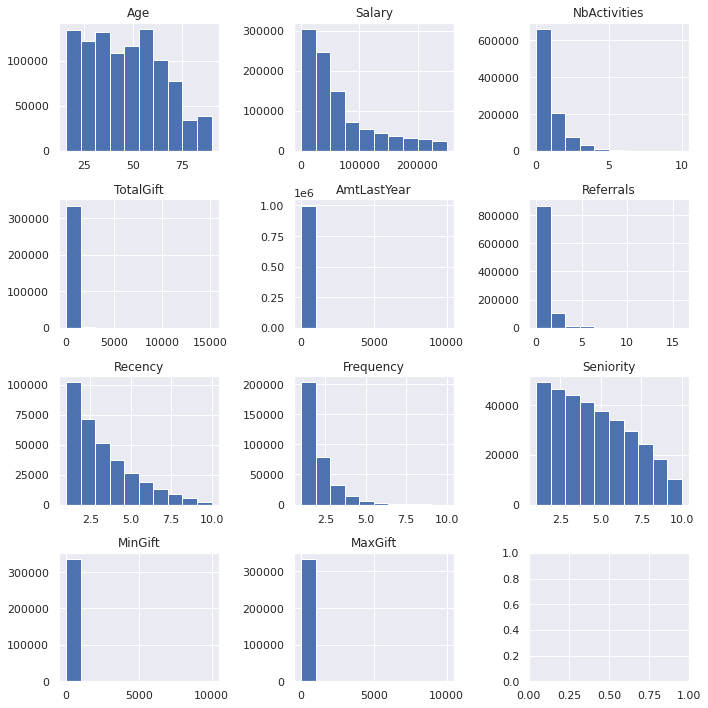

In [18]:
fig, axes = plt.subplots(4,3, figsize=(10, 10))

for i,el in enumerate(numeric):
    a = data_merge.hist(el, ax=axes.flatten()[i])

plt.tight_layout() 

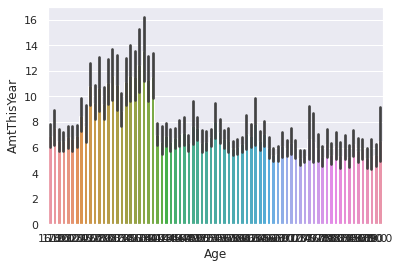

In [19]:
sns.barplot(x = data_merge['Age'], y = data_merge['AmtThisYear'])
plt.show()

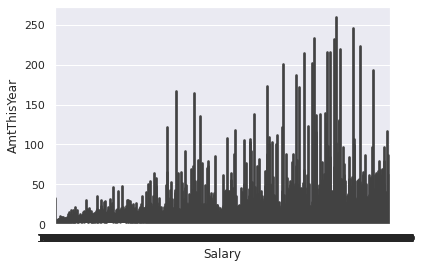

In [20]:
sns.barplot(x = data_merge['Salary'], y = data_merge['AmtThisYear'])
plt.show()

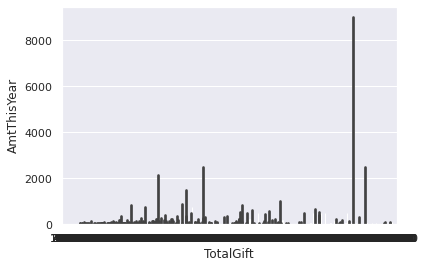

In [21]:
sns.barplot(x = data_merge['TotalGift'], y = data_merge['AmtThisYear'])
plt.show()

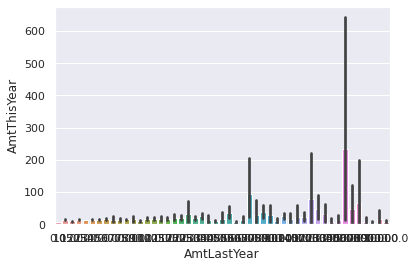

In [22]:
sns.barplot(x = data_merge['AmtLastYear'], y = data_merge['AmtThisYear'])
plt.show()

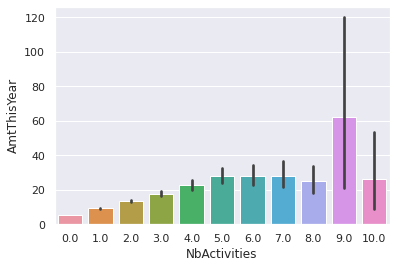

In [23]:
sns.barplot(x = data_merge['NbActivities'], y = data_merge['AmtThisYear'])
plt.show()

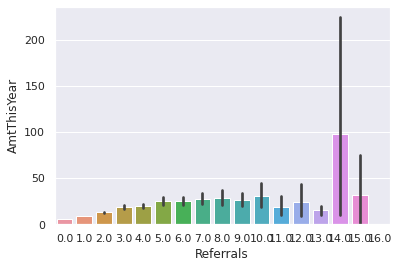

In [24]:
sns.barplot(x = data_merge['Referrals'], y = data_merge['AmtThisYear'])
plt.show()

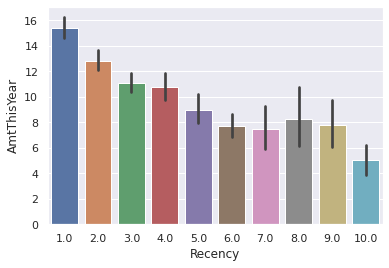

In [25]:
sns.barplot(x = data_merge['Recency'], y = data_merge['AmtThisYear'])
plt.show()

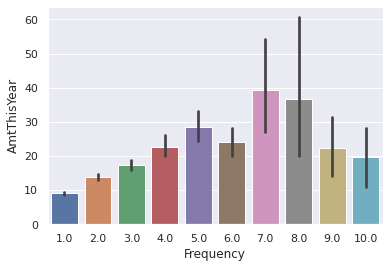

In [26]:
sns.barplot(x = data_merge['Frequency'], y = data_merge['AmtThisYear'])
plt.show()

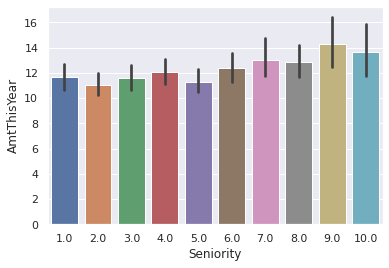

In [27]:
sns.barplot(x = data_merge['Seniority'], y = data_merge['AmtThisYear'])
plt.show()

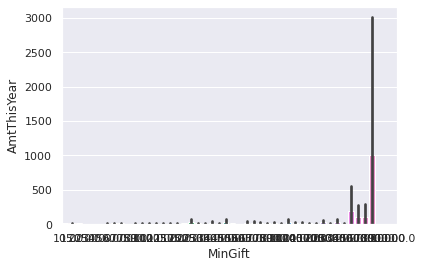

In [28]:
sns.barplot(x = data_merge['MinGift'], y = data_merge['AmtThisYear'])
plt.show()

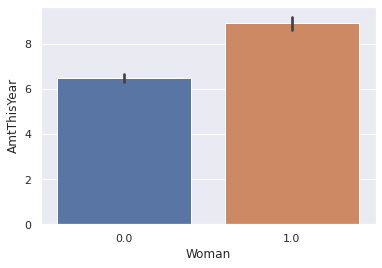

In [29]:
sns.barplot(x = data_merge['Woman'], y = data_merge['AmtThisYear'])
plt.show()

## Preprocessing

In [30]:
import numpy as np
def deal_with_nulls(data):

  #Recency
  data.loc[(data['GaveLastYear'] == 1.0), 'Recency'] = 1
  data.loc[np.isnan(data['Recency']) & (data['GaveLastYear'] == 0.0), 'Recency'] = 12
  data.loc[np.isnan(data['Recency']) & (data['GaveLastYear'] == 1.0), 'Recency'] = 1

  #Frequency
  data.loc[(data['GaveLastYear'] == 1.0), 'Frequency'] += 1
  data.loc[np.isnan(data['Frequency']) & (data['GaveLastYear'] == 0.0), 'Frequency'] = 0
  data.loc[np.isnan(data['Frequency']) & (data['GaveLastYear'] == 1.0), 'Frequency'] = 1

  #Seniority
  data['Seniority'].fillna(12, inplace = True)

  #TotalGift
  data.loc[(data['GaveLastYear'] == 1.0), 'TotalGift'] += data["AmtLastYear"]
  data.loc[np.isnan(data['TotalGift']) & (data['GaveLastYear'] == 0.0), 'TotalGift'] = 0 
  data.loc[np.isnan(data['TotalGift']) & (data['GaveLastYear'] == 1.0), 'TotalGift'] = data["AmtLastYear"]
  

  #MinGift
  data.loc[data['GaveLastYear'] == 1 & (data['AmtLastYear'] < data['MinGift']), 'MinGift'] = data['AmtLastYear']
  data.loc[np.isnan(data['MinGift']) & (data['GaveLastYear'] == 0.0), 'MinGift'] = 0 
  data.loc[np.isnan(data['MinGift']) & (data['GaveLastYear'] == 1.0), 'MinGift'] = data["AmtLastYear"]

  #MaxGift
  data.loc[data['GaveLastYear'] == 1 & (data['AmtLastYear'] > data['MaxGift']), 'MaxGift'] = data["AmtLastYear"]
  data.loc[np.isnan(data['MaxGift']) & (data['GaveLastYear'] == 0.0), 'MaxGift'] = 0 
  data.loc[np.isnan(data['MaxGift']) & (data['GaveLastYear'] == 1.0), 'MaxGift'] = data["AmtLastYear"]

  return data

In [31]:
def one_hot_encoding(data, columns):
  encoded_data = pd.get_dummies(data, columns = columns)
  
  return encoded_data

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scalate(data, to_scale):
  #scaler = StandardScaler()
  scaler = MinMaxScaler()
  scaler.fit(data[to_scale])
  transformed = scaler.transform(data[to_scale])
  data[to_scale] = pd.DataFrame(transformed, columns = data[to_scale].columns)

  return data

In [33]:
prepro_data = deal_with_nulls(data_merge)
prepro_data.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,1.0,2.0,2.0,1010.0,10.0,0.0,0.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
prepro_data = one_hot_encoding(prepro_data, ['Education', 'City'])
prepro_data = scalate(prepro_data, numeric)

In [35]:
prepro_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  float64
 1   LastName                        999977 non-null   object 
 2   FirstName                       999996 non-null   object 
 3   Woman                           1000000 non-null  float64
 4   Age                             1000000 non-null  float64
 5   Salary                          1000000 non-null  float64
 6   SeniorList                      1000000 non-null  float64
 7   NbActivities                    1000000 non-null  float64
 8   Referrals                       1000000 non-null  float64
 9   Recency                         1000000 non-null  float64
 10  Frequency                       1000000 non-null  float64
 11  Seniority                       1000000 non-null  float64
 12  T

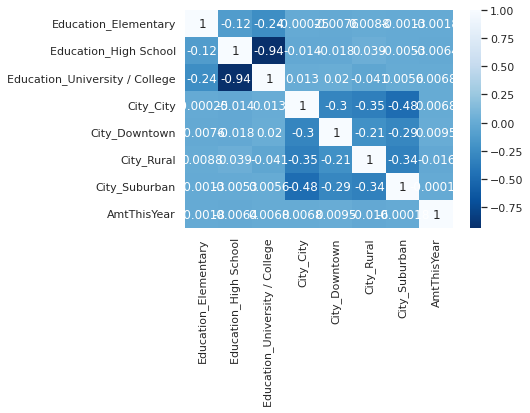

In [36]:
dummies_name = ['Education_Elementary', 'Education_High School', 'Education_University / College', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban']
corr_dummies = prepro_data[dummies_name+['AmtThisYear']].corr()
sns.heatmap(corr_dummies, annot=True, cmap="Blues_r")
plt.show()

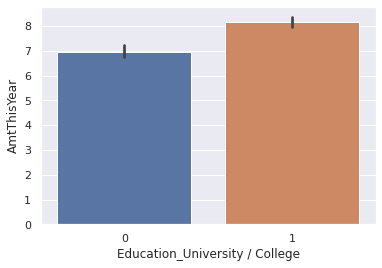

In [37]:
sns.barplot(x = prepro_data['Education_University / College'], y = prepro_data['AmtThisYear'])
plt.show()


## Data Partition

In [38]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(prepro_data, test_size=0.2, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,AmtLastYear,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
327640,2327641.0,WASH,LISA,1.0,0.783784,0.2284,6.0,0.0,0.0625,0.0,...,0.0030,0.0,0.0,0,0,1,0,0,0,1
866706,2866707.0,BESONEN,WILLIAM,0.0,0.121622,0.1768,10.0,0.2,0.1250,0.0,...,0.0025,1.0,75.0,0,0,1,1,0,0,0


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [39]:
from sklearn import linear_model

chosen_columns = ['Age', 'Salary','MinGift', 'GaveLastYear','Woman', 'AmtLastYear', 'NbActivities', 'Frequency'] + dummies_name
X_train = train[chosen_columns] 
Y_train = train['AmtThisYear']
X_valid = validation[chosen_columns] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [40]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.162623359375
7728.346519718628
87.91101478039386


## **Regression Tree Model**

In [41]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [42]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.279407263678419
7732.159292550362
87.93269751662554


## Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(max_depth=5, random_state=12345)
RF_model.fit(X_train, Y_train)

RF_predict = RF_model.predict(X_valid)

In [44]:
#MAE
print(metrics.mean_absolute_error(Y_valid,RF_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,RF_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,RF_predict)))

13.219706484442629
7728.296780473448
87.91073188452846


In [45]:
## SGDRegressor

In [46]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

sgd.fit(X_train, Y_train)

sgd_predict = RF_model.predict(X_valid)

In [47]:
#MAE
print(metrics.mean_absolute_error(Y_valid,sgd_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,sgd_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,sgd_predict)))

13.219706484442629
7728.296780473448
87.91073188452846


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [48]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

In [49]:
data5 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data6 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [50]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

#scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0)

scoring_data = deal_with_nulls(scoring_data)
scoring_data = one_hot_encoding(scoring_data,['Education', 'City'])
scoring_data = scalate(scoring_data, numeric)


In [51]:
scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  float64
 1   GaveLastYear                    1000000 non-null  float64
 2   AmtLastYear                     1000000 non-null  float64
 3   LastName                        999977 non-null   object 
 4   FirstName                       999996 non-null   object 
 5   Woman                           1000000 non-null  float64
 6   Age                             1000000 non-null  float64
 7   Salary                          1000000 non-null  float64
 8   SeniorList                      1000000 non-null  float64
 9   NbActivities                    1000000 non-null  float64
 10  Referrals                       1000000 non-null  float64
 11  Recency                         1000000 non-null  float64
 12  F

In [52]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[chosen_columns]
RF_predict_end=RF_model.predict(X)

scoring_data['Prediction'] = RF_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,...,MinGift,MaxGift,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban,Prediction
459485,2459486.0,1.0,0.5,IULO,LEANA,1.0,0.270270,0.2220,8.0,0.3,...,0.0075,0.5,0,1,0,0,1,0,0,2364.880858
420890,2420891.0,1.0,0.9,BEIL,MARGARET,1.0,0.283784,0.4168,10.0,0.5,...,0.7000,0.9,1,0,0,0,1,0,0,888.944758
404784,2404785.0,1.0,0.1,DENNEY,BRIANNA,1.0,0.297297,0.7696,7.0,0.3,...,0.1000,0.1,0,0,1,0,1,0,0,652.848587
478470,2478471.0,1.0,0.4,WEBB,PHYLLIS,1.0,0.594595,0.8064,10.0,0.1,...,0.0010,0.4,0,0,1,1,0,0,0,640.032358
631673,2631674.0,1.0,1.0,KOPPENHEFFER,JENNIFER,1.0,0.243243,0.7460,9.0,0.3,...,0.0500,1.0,0,0,1,1,0,0,0,629.818518


## Exporting Results to a CSV File

In [53]:
Result= scoring_data[['ID']]
Result.to_csv('Round1_Output9.csv', index=False)

In [54]:
# Define your cutoff and choose a number of rows to submit to the leaderboard
NB = 60000
submission = Result.head(NB)
submission.to_csv('Round1 Output9.csv', index=False)

In [55]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [56]:
!head Round1\ Output9.csv

ID
2459486.0
2420891.0
2404785.0
2478471.0
2631674.0
2804813.0
2735060.0
2689727.0
2766830.0
